In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pmd
from prophet import Prophet
import statsmodels as sm

warnings.filterwarnings('ignore')

c:\Users\mnkh\Desktop\Magistr\scr\01\venvSCR2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('data\owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'OWID_ENG', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR',
       'OWID_EUN', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', '

In [5]:
df_cze = (
    df[
        df['iso_code']=='CZE'
    ]
    [['date', 'new_cases']]
    .reset_index(drop=True)
    .rename(columns={'date':'ds', 'new_cases':'y'})
    .astype({'ds':'datetime64'})
)

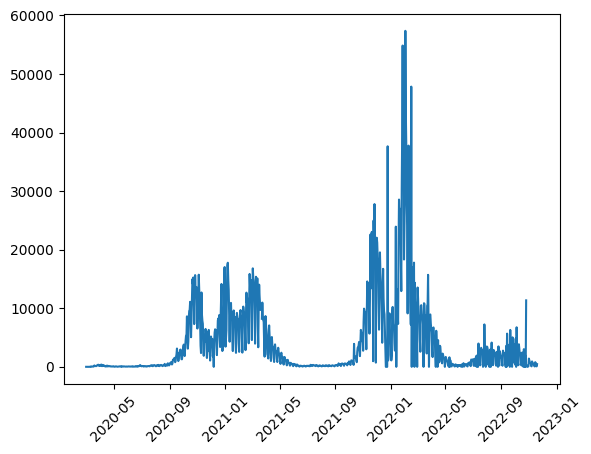

In [6]:
plt.plot(df_cze['ds'], df_cze['y'])
plt.xticks(rotation=45)
plt.show()

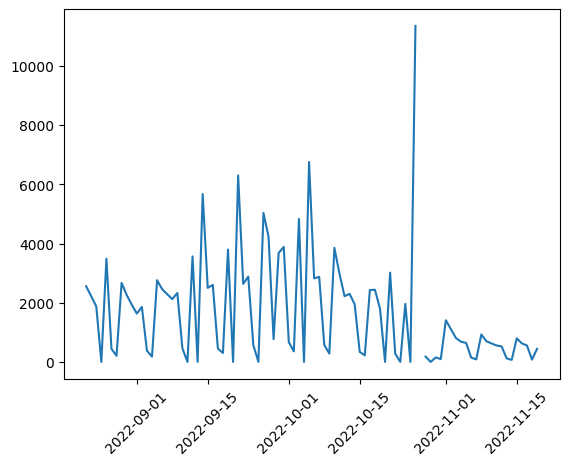

In [7]:
df_cze_3m = df_cze.tail(90)
plt.plot(df_cze_3m['ds'], df_cze_3m['y'])
plt.xticks(rotation=45)
plt.show()

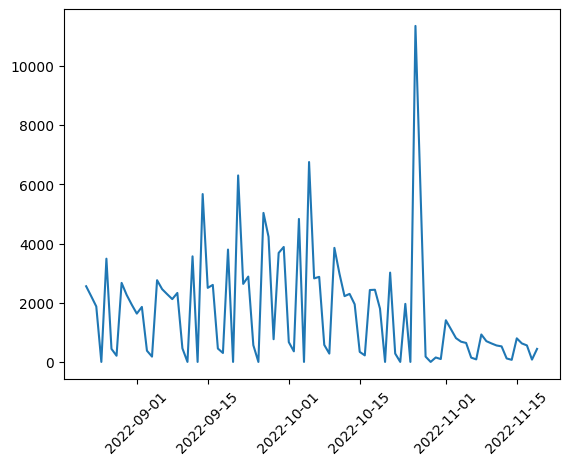

In [8]:
df_cze_3m.loc[:,'y'] = df_cze_3m['y'].ffill().add(df_cze_3m['y'].bfill()).div(2)
plt.plot(df_cze_3m['ds'], df_cze_3m['y'])
plt.xticks(rotation=45)
plt.show()

In [9]:
model = sm.tsa.arima.model.ARIMA(df_cze_3m['y'], order=(1, 0, 0), seasonal_order=(0,1,1,7), trend='n')
res = model.fit()
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   90
Model:             ARIMA(1, 0, 0)x(0, 1, [1], 7)   Log Likelihood                -742.107
Date:                           Sun, 20 Nov 2022   AIC                           1490.214
Time:                                   16:12:11   BIC                           1497.471
Sample:                                        0   HQIC                          1493.130
                                            - 90                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1107      0.096      1.154      0.249      -0.077       0.299
ma.S.L7       -0.8858      0.115     -7.714

In [10]:
stepwise_fit = pmd.auto_arima(
    df_cze_3m['y'],
    start_p=0, start_q=0,
    max_p=3, max_q=3, m=7,
    start_P=0,
    information_criterion='bic', trace=True,
    seasonal=True, n_jobs=-1, stepwise=True
)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,1)[7] intercept   : BIC=1664.878, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : BIC=1663.020, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : BIC=1644.268, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : BIC=1612.132, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[7]             : BIC=1658.544, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : BIC=1612.199, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : BIC=1604.836, Time=0.49 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : BIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : BIC=inf, Time=0.66 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : BIC=1605.765, Time=0.69 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : BIC=1612.316, Time=0.56 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : BIC=1608.764, Time=0.60 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : BIC=1619.238, Time=0.81 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : BIC=1656.680, Time=0.37 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : BIC=1

In [11]:
model = sm.tsa.arima.model.ARIMA(df_cze_3m['y'], order=(0, 1, 1), seasonal_order=(1,0,1,7), trend='t')
res = model.fit()
print(res.summary())

                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                   90
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -792.335
Date:                         Sun, 20 Nov 2022   AIC                           1594.669
Time:                                 16:12:25   BIC                           1607.112
Sample:                                      0   HQIC                          1599.685
                                          - 90                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -30.5086     74.042     -0.412      0.680    -175.629     114.611
ma.L1         -0.9063      0.082    -11.002      0.000     

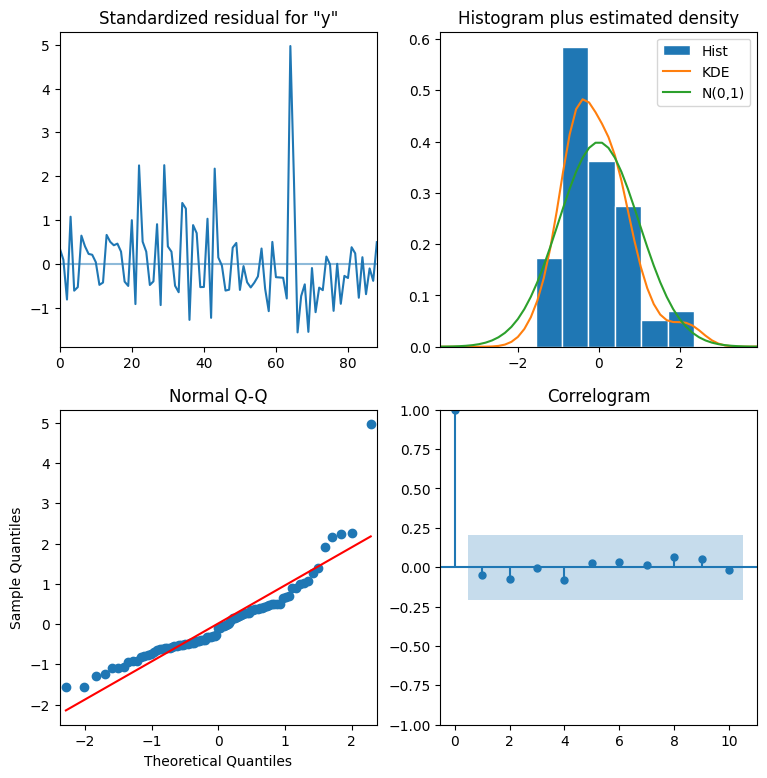

In [12]:
res.plot_diagnostics(figsize=(9,9))
plt.show()

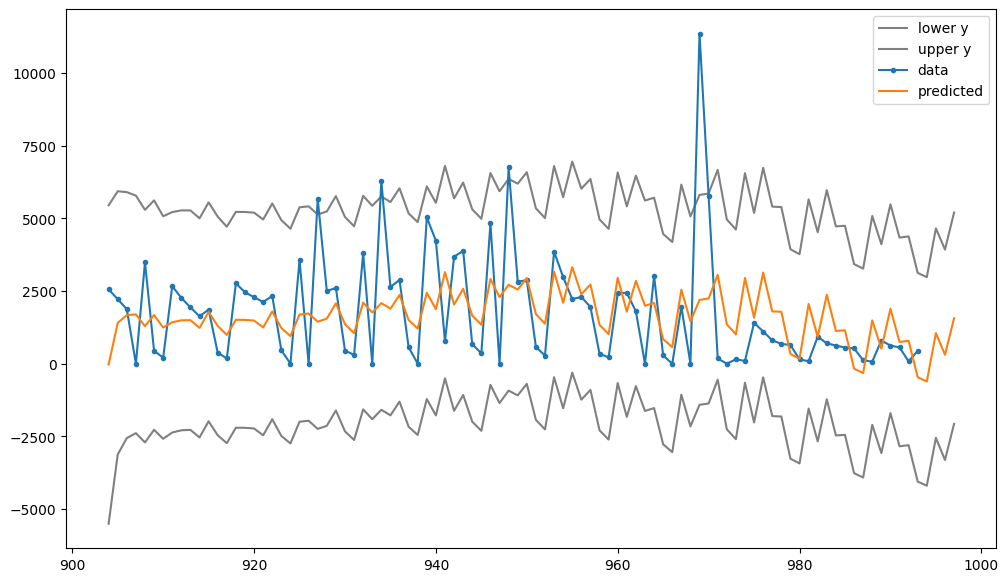

In [13]:
preds = res.get_prediction(end=len(df_cze_3m)+3)
ci = preds.conf_int()

fig = ci.plot(color='grey', figsize=(12, 7))
res.data.orig_endog.plot(label='data', marker='.', fig=fig)
preds.predicted_mean.plot(label='predicted', fig=fig)
plt.legend()
plt.show()

In [14]:
m.plot_components(forecast)


NameError: name 'm' is not defined

In [ ]:
df_cze_1m = df_cze.tail(30)
plt.plot(df_cze_1m['ds'], df_cze_1m['y'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
stepwise_fit = pmd.auto_arima(
    df_cze_1m['y'],
    start_p=1, start_q=1,
    max_p=3, max_q=3, m=7,
    start_P=0,
    information_criterion='bic', trace=True,
    seasonal=True, n_jobs=-1
)

In [ ]:
model = sm.tsa.arima.model.ARIMA(df_cze_1m['y'], order=(0, 0, 0), seasonal_order=(0,0,0,7), trend='t')
res = model.fit()
print(res.summary())

In [ ]:
res.plot_diagnostics(figsize=(9,9))
plt.show()

In [ ]:
preds = res.get_prediction(end=len(df_cze_1m)+3)
ci = preds.conf_int()

fig = ci.plot(color='grey', figsize=(12, 7))
res.data.orig_endog.plot(label='data', marker='.', fig=fig)
preds.predicted_mean.plot(label='predicted', fig=fig)
plt.legend()
plt.show()

In [ ]:
df_cze_3w = df_cze.tail(21)
plt.plot(df_cze_3w['ds'], df_cze_3w['y'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
stepwise_fit = pmd.auto_arima(
    df_cze_3w['y'],
    start_p=1, start_q=1,
    max_p=3, max_q=3, m=7,
    start_P=0,
    information_criterion='bic', trace=True,
    seasonal=True, n_jobs=-1
)

In [ ]:
model = sm.tsa.arima.model.ARIMA(df_cze_1m['y'], order=(0, 0, 1), seasonal_order=(1,0,0,7), trend='t')
res = model.fit()
print(res.summary())

In [ ]:
res.plot_diagnostics(figsize=(9,9))
plt.show()

In [ ]:
preds = res.get_prediction(end=len(df_cze_1m)+3)
ci = preds.conf_int()

fig = ci.plot(color='grey', figsize=(12, 7))
res.data.orig_endog.plot(label='data', marker='.', fig=fig)
preds.predicted_mean.plot(label='predicted', fig=fig)
plt.legend()
plt.show()

In [ ]:
m = Prophet()
m.fit(df_cze_3m)
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)
m.plot(forecast).show()

In [ ]:
m = Prophet()
m.fit(df_cze_1m)
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)
m.plot(forecast).show()

In [ ]:
m = Prophet()
m.fit(df_cze_3w)
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)
m.plot(forecast).show()